Вы — менеджер в Яндекс Еде. Сегодня все аналитики уехали на конференцию и надо срочно проверить гипотезу, что пользователи, которые выбирают больше двух комплектов приборов, оставляют больше чаевых, чем остальные. У вас есть доступ к таблице с чаевыми за Январь 2022 года. Скачать таблицу: https://clck.ru/dWtzM

cutlery — количество столовых приборов
date — дата и время покупки
order_price — сумма заказа
uid — уникальный id пользователя
tips — сумма чаевых
order_id — уникальный номер заказа

Проанализируйте данные. Найдите подтверждение или опровержение гипотезы.
Соберите сегмент пользователей для дальнейшей коммуникации. В сегмент должны попасть все uid пользователей, которые добавляли в заказ больше двух комплектов столовых приборов и делали заказ не в январские праздники на сумму больше 800p. Укажите количество таких пользователей.

Для решения задачи импортируем необходимые библиотеки для анализа данных, проверки статистических гипотез и визуализации данных:

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Прочитаем файл данных:

In [53]:
df = pd.read_csv("shmya_final_version (1).csv")

Посмотрим как выглядят данные:

In [54]:
df[:]

,date,cutlery,tips,order_price,uid,order_id
0,2022-01-17 06:38:43,3,100,1001,120967,73041443
1,2022-01-23 11:09:22,4,110,309,325757,60500835
2,2022-01-24 19:40:03,1,10,891,986730,43230531
3,2022-01-14 18:01:22,5,70,749,868648,46180789
4,2022-01-19 22:32:43,2,10,469,863523,59266169
...,...,...,...,...,...,...
26052,2022-01-04 05:21:39,4,10,763,182587,85041983
26053,2022-01-18 14:43:12,3,60,790,187031,47894568
26054,2022-01-26 18:08:02,1,90,502,247419,75350869
26055,2022-01-18 05:55:09,2,80,418,474601,79438423


Удалим данные, где чаевые не оставляли (чтобы не смещать среднее, и увидить значимые различия):

In [55]:
df = df.drop(df[df.tips == 0].index)

Добавляем новый столбец "Group", в котором показываем, что если количество столовых приборов <=2, то ставим в соответствие группу 0, если >2, то ставим группу 1. Делаем это для удобства анализа данных в дальнейшем:

In [56]:
df['Group'] = np.where(df['cutlery']<=2, 0, 1)

Далее посмотрим общую информацию по данным, есть ли пропуски, какие типы данных и пр.:

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23303 entries, 0 to 26056
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         23303 non-null  object
 1   cutlery      23303 non-null  int64 
 2   tips         23303 non-null  int64 
 3   order_price  23303 non-null  int64 
 4   uid          23303 non-null  int64 
 5   order_id     23303 non-null  int64 
 6   Group        23303 non-null  int32 
dtypes: int32(1), int64(5), object(1)
memory usage: 1.3+ MB


In [58]:
df.isnull().sum()

date           0
cutlery        0
tips           0
order_price    0
uid            0
order_id       0
Group          0
dtype: int64

In [59]:
df.nunique()

date           23202
cutlery            6
tips              17
order_price     1277
uid             6433
order_id        6457
Group              2
dtype: int64

Далее посмотрим основные вероятностные характеристики по каждому из атрибутов задачи

In [60]:
df.describe()

,cutlery,tips,order_price,uid,order_id,Group
count,23303.000000,23303.000000,23303.000000,23303.000000,2.330300e+04,23303.000000
mean,2.987727,68.399348,675.662189,550253.050938,5.498195e+07,0.616487
std,1.359165,42.961009,247.083175,257066.321387,2.574425e+07,0.486252
min,1.000000,10.000000,254.000000,100192.000000,1.000406e+07,0.000000
25%,2.000000,30.000000,481.000000,326083.000000,3.280629e+07,0.000000
50%,3.000000,60.000000,662.000000,550654.000000,5.488086e+07,1.000000
75%,4.000000,100.000000,842.000000,776851.000000,7.698710e+07,1.000000
max,6.000000,170.000000,1939.000000,999966.000000,9.997691e+07,1.000000


Посмотрим, какие чаевые в среднем оставляли в зависимости от количества столовых приборов

[Text(0, 0, '44.587'),
 Text(0, 0, '57.3773'),
 Text(0, 0, '67.7053'),
 Text(0, 0, '68.0586'),
 Text(0, 0, '108.384'),
 Text(0, 0, '148.594')]

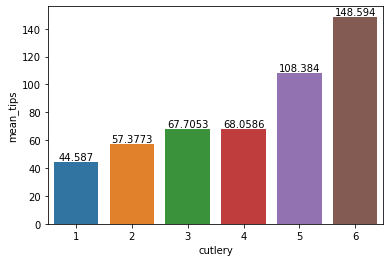

In [61]:
tips_mean = df['tips'].groupby([df.cutlery]).mean()
ax = sns.barplot(x=tips_mean.index, y=tips_mean.values, data=df)
ax.set(xlabel='cutlery', ylabel='mean_tips')
ax.bar_label(ax.containers[0])

Далее посмотрим, какие в среднем чаевые оставляли клиенты, у которых было не более 2ух столовых приборов в заказе (Group 0), и у которых было более двух приборов в заказе (Group 1)

[Text(0.5, 0, 'Group (0 - cutlery<=2, 1 - cutlery>2)'), Text(0, 0.5, 'tips')]

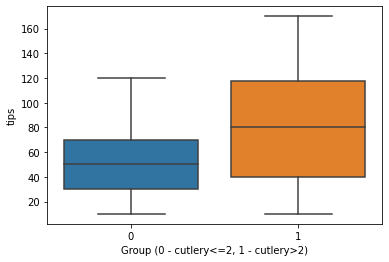

In [62]:
ax = sns.boxplot(x=df.Group, y=df.tips, data=df)
ax.set(xlabel='Group (0 - cutlery<=2, 1 - cutlery>2)', ylabel='tips')

Посмотрим на плотность вероятности распределения чаевых для клиентов, у которых было не более 2ух столовых приборов в заказе (Group 0), и у которых было более двух приборов в заказе (Group 1)

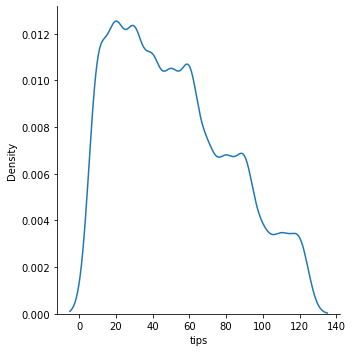

In [63]:
sns.displot(data=df[df.Group==0], x="tips", kind='kde')

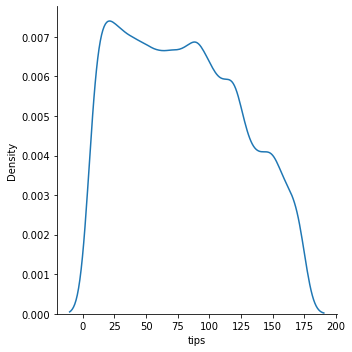

In [64]:
sns.displot(data=df[df.Group==1], x="tips", kind='kde')

Также проверим гипотезу о нормальности распределения чаевых для клиентов, у которых было не более 2ух столовых приборов в заказе (Group 0), и у которых было более двух приборов в заказе (Group 1), с использованием Критерия Шапиро-Уилка. За критерий значимости возьмем p-value = 0.05 (стандартное значение для статистических задач):

In [65]:
print(stats.shapiro(df[df.Group==0].sample(100, random_state=10).tips));

ShapiroResult(statistic=0.9355037212371826, pvalue=0.00010360267333453521)


In [66]:
print(stats.shapiro(df[df.Group==1].sample(100, random_state=10).tips));

ShapiroResult(statistic=0.9319316744804382, pvalue=6.416433461708948e-05)


В целом по построенным распределениям, а также по полученным значениям Критерия Шапиро-Уилка, делаем вывод о том, что данные распределены не по нормальному закону распределения. Это значит, что для проверки статистических гипотез нужно пользоваться U-критерием Манна-Уитни

Наша нулевая гипотеза: пользователи, которые выбирают больше двух комплектов приборов, оставляют НЕ больше чаевых, чем остальные.

Пользуемся U-критерием Манна-Уитни. За критерий значимости возьмем p-value = 0.05 (стандартное значение для статистических задач):

In [67]:
print(stats.mannwhitneyu(df[df.Group==0].sample(100, random_state=10).tips, df[df.Group==1].sample(100, random_state=10).tips))

MannwhitneyuResult(statistic=4136.5, pvalue=0.03432919204254639)


Полученное p-value<0.05, соответственно отвергаем нулевую гипотезу, и принимаем альтернативную гипотезу о том, что статистически пользователи, которые выбирают больше двух комплектов приборов, оставляют БОЛЬШЕ чаевых, чем остальные

Чтобы еще больше убедиться в этом, посмотрим доверительные интервалы:

In [68]:
def get_interval_t(data, sample_size, random_state=10, alpha=0.95, qq=2):
    data_sample = data.sample(sample_size)
    n = data_sample.shape[0]
    sample_mean = data_sample.mean()

    # Вычисление стандартной ошибки среднего значения S/sqrt(n)
    se = stats.sem(data_sample)
    q = (1-((1-alpha)/qq))
    t_value = stats.t.ppf(q, n-1)

    return (sample_mean - t_value * se, sample_mean + t_value * se)

In [69]:
sample_means_a1=df[df.Group==0].sample(100, random_state=10).tips
sample_means_a2=df[df.Group==1].sample(100, random_state=10).tips
print(get_interval_t(sample_means_a1, len(sample_means_a1), random_state=10, alpha=0.95, qq=2))
print(get_interval_t(sample_means_a2, len(sample_means_a2), random_state=10, alpha=0.95, qq=2))

(48.15508746269192, 60.64491253730808)
(61.42085357738837, 79.57914642261163)


Видим, что и доверительный интервал не пересекается у двух выборок. Таким образом, подтверждаем изначально поставленный вопрос задачи и постулируем: пользователи, которые выбирают больше двух комплектов приборов, оставляют больше чаевых, чем остальные. 

Посмотрим, на сколько больше они оставляют (отличие средних выборок):

In [70]:
df.tips.groupby(df.Group).mean()[1]-df.tips.groupby(df.Group).mean()[0]

27.322574400527415

Далее отвечаем на следующий вопрос данной задачи: 
соберите сегмент пользователей для дальнейшей коммуникации. В сегмент должны попасть все uid пользователей, которые добавляли в заказ больше двух комплектов столовых приборов и делали заказ не в январские праздники на сумму больше 800p. Укажите количество таких пользователей.

За январские праздники принят период до 2022-01-08 23:59:59:

In [71]:
segment = df[(df.cutlery>2) & (df.order_price>800) & (df.date>= '2022-01-09 00:00:00')]

Ответ:

In [72]:
segment.uid.nunique()

2607